In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/noah/Desktop/Player Efficiency Analysis/CSV/hurts_dataset2.csv')

In [3]:
df.head()

,Rank,Year,Date,Week,Team,H/A,Opp,Result,Status,Pass Att,Cmp%,Pass YDs,Pass TDs,Int,Sacks,Rush Att,Rush YDs,TDs,Snaps,Class
0,13.0,2020.0,2020-12-13,14.0,PHI,Home,NOR,W 24-21,Start,30.0,56.67,167.0,1.0,0.0,0.0,18.0,106.0,0.0,69.0,1
1,14.0,2020.0,2020-12-20,15.0,PHI,Away,ARI,L 26-33,Start,44.0,54.55,338.0,3.0,0.0,6.0,11.0,63.0,1.0,83.0,0
2,15.0,2020.0,2020-12-27,16.0,PHI,Away,DAL,L 17-37,Start,39.0,53.85,342.0,1.0,2.0,3.0,9.0,69.0,0.0,73.0,0
3,16.0,2020.0,2021-01-03,17.0,PHI,Home,WAS,L 14-20,Start,20.0,35.00,72.0,0.0,1.0,1.0,8.0,34.0,2.0,50.0,0
4,17.0,2021.0,2021-09-12,1.0,PHI,Away,ATL,W 32-6,Start,35.0,77.14,264.0,3.0,0.0,1.0,7.0,62.0,0.0,71.0,1


This section will focus on finding useful and important metrics, patterns, and variable associations in Jalen Hurts's data.

Firstly, the mean, median, max, min, and range of the data will be found. 

In [4]:
df.iloc[:, 9:].mean()

Pass Att     31.043478
Cmp%         63.525000
Pass YDs    233.891304
Pass TDs      1.347826
Int           0.608696
Sacks         2.304348
Rush Att     10.239130
Rush YDs     48.826087
TDs           0.826087
Snaps        67.086957
Class         0.717391
dtype: float64

In [5]:
df.iloc[:, 9:].median()

Pass Att     31.00
Cmp%         64.05
Pass YDs    223.00
Pass TDs      1.00
Int           0.00
Sacks         2.00
Rush Att      9.00
Rush YDs     44.00
TDs           1.00
Snaps        68.50
Class         1.00
dtype: float64

In [6]:
max = df.iloc[:, 9:].max()
min = df.iloc[:, 9:].min()
range = max - min

print('Maximum Values:\n',max)

print('Minimum Values:\n',min)

print('Range of Values:\n',range)

Maximum Values:
 Pass Att     48.00
Cmp%         83.87
Pass YDs    387.00
Pass TDs      4.00
Int           3.00
Sacks         6.00
Rush Att     18.00
Rush YDs    157.00
TDs           3.00
Snaps        83.00
Class         1.00
dtype: float64
Minimum Values:
 Pass Att    14.0
Cmp%        35.0
Pass YDs    72.0
Pass TDs     0.0
Int          0.0
Sacks        0.0
Rush Att     2.0
Rush YDs     6.0
TDs          0.0
Snaps       46.0
Class        0.0
dtype: float64
Range of Values:
 Pass Att     34.00
Cmp%         48.87
Pass YDs    315.00
Pass TDs      4.00
Int           3.00
Sacks         6.00
Rush Att     16.00
Rush YDs    151.00
TDs           3.00
Snaps        37.00
Class         1.00
dtype: float64


Some key patterns and connections between variables will be looked at to determine which factors have the biggest effect on each other. 

In [7]:
df.head()

,Rank,Year,Date,Week,Team,H/A,Opp,Result,Status,Pass Att,Cmp%,Pass YDs,Pass TDs,Int,Sacks,Rush Att,Rush YDs,TDs,Snaps,Class
0,13.0,2020.0,2020-12-13,14.0,PHI,Home,NOR,W 24-21,Start,30.0,56.67,167.0,1.0,0.0,0.0,18.0,106.0,0.0,69.0,1
1,14.0,2020.0,2020-12-20,15.0,PHI,Away,ARI,L 26-33,Start,44.0,54.55,338.0,3.0,0.0,6.0,11.0,63.0,1.0,83.0,0
2,15.0,2020.0,2020-12-27,16.0,PHI,Away,DAL,L 17-37,Start,39.0,53.85,342.0,1.0,2.0,3.0,9.0,69.0,0.0,73.0,0
3,16.0,2020.0,2021-01-03,17.0,PHI,Home,WAS,L 14-20,Start,20.0,35.00,72.0,0.0,1.0,1.0,8.0,34.0,2.0,50.0,0
4,17.0,2021.0,2021-09-12,1.0,PHI,Away,ATL,W 32-6,Start,35.0,77.14,264.0,3.0,0.0,1.0,7.0,62.0,0.0,71.0,1


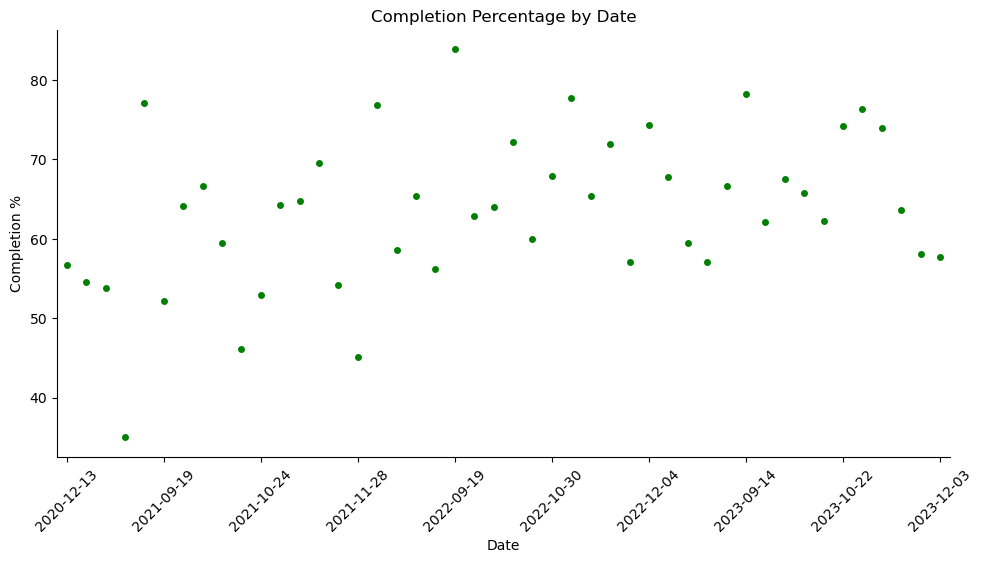

In [8]:
sns.catplot(data = df, x = 'Date', y = 'Cmp%', aspect = 2, color="green")
plt.xlabel('Date')
plt.xticks(np.arange(0, len(df['Date']), 5),rotation = 45)
plt.ylabel('Completion %')
plt.title('Completion Percentage by Date')
plt.show()

Completion % has trended upwards throughout the years of his career. This is a sign that with time and experience, Hurts has become a more efficient passer. 

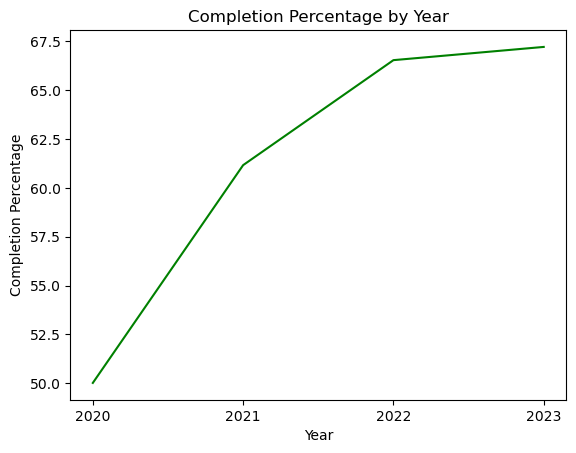

In [10]:
df.groupby('Year')['Cmp%'].mean().plot.line(color = 'green')
plt.xlabel('Year')
plt.xticks(np.arange(2020, 2024, 1))
plt.ylabel('Completion Percentage')
plt.title('Completion Percentage by Year')
plt.show()

An averaged version of the scatterplot which shows how his yearly average completion percentage is increasing. 

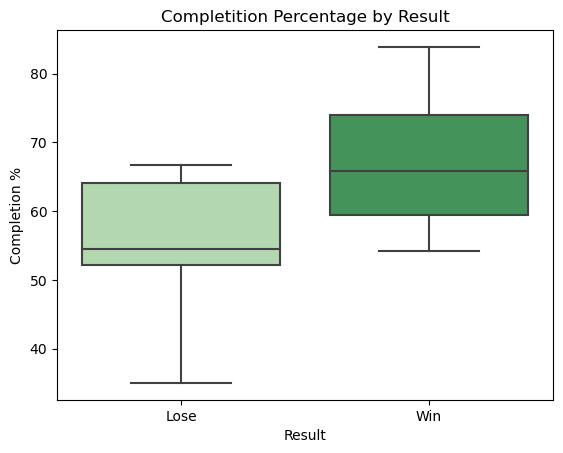

In [11]:
fig = sns.boxplot(x="Class", y="Cmp%", data=df, palette = 'Greens')
plt.xlabel('Result')
fig.set_xticklabels(['Lose','Win'])
plt.ylabel('Completion %')
plt.title('Completition Percentage by Result')
plt.show()

When Jalen wins, he has a significantly higher Completion %. When he loses, he has a significatnly low Completion %. It can be concluded that when Completion % is significantly low, there is a high probability of a losing. When Completion % dips below 55%, the data shows almost certainty of losing. 

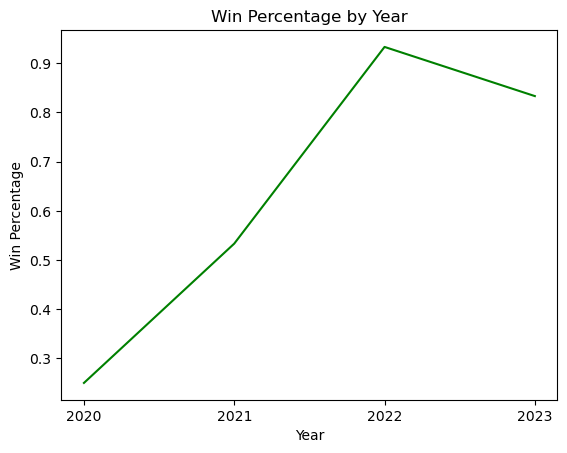

In [12]:
df.groupby('Year')['Class'].mean().plot.line(color = 'green')
plt.xlabel('Year')
plt.xticks(np.arange(2020, 2024, 1))
plt.ylabel('Win Percentage')
plt.title('Win Percentage by Year')
plt.show()

Through Hurts's first 4 years in the NFL, his Win Percentage has increased greatly. He started at a sub 30% win percentage and took that to just over 50% his first year. After that he has steadily won more and more games bringing his percentage at the half way point through the 2023-2024 season to just over 80%.

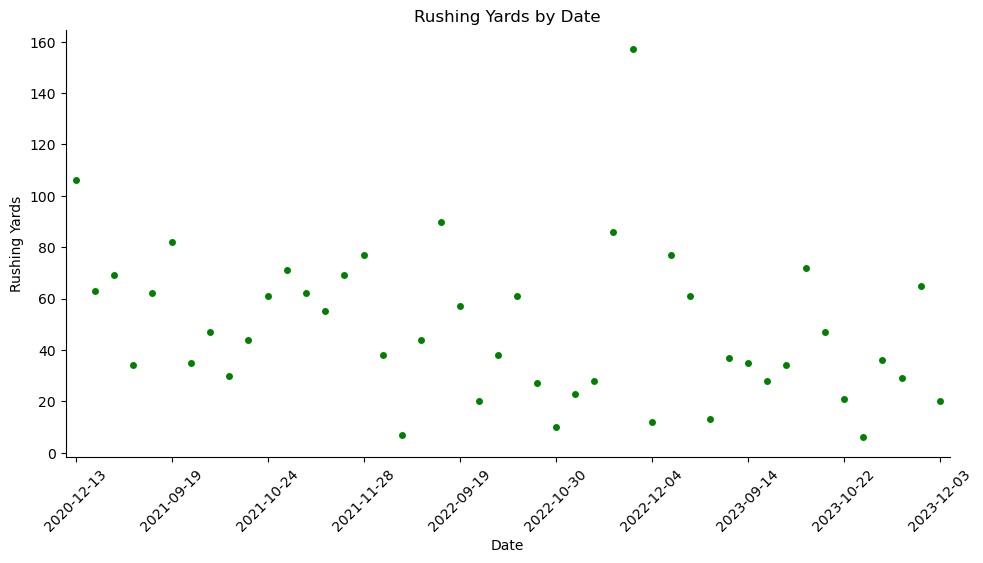

In [13]:
sns.catplot(data = df, x = 'Date', y = 'Rush YDs', aspect = 2, color="green")
plt.xlabel('Date')
plt.xticks(np.arange(0, len(df['Date']), 5),rotation = 45)
plt.ylabel('Rushing Yards')
plt.title('Rushing Yards by Date')
plt.show()

No significant changes in rushing yards through the years. If anything the trend could be slightly downward. Could mean an improvement in other areas or a decrease in confidence when running the ball. 

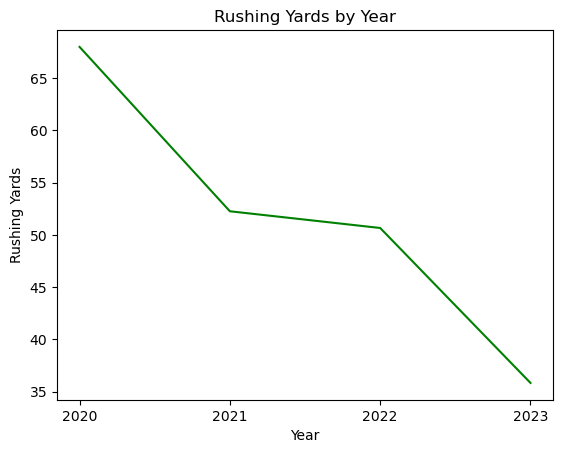

In [25]:
df.groupby('Year')['Rush YDs'].mean().plot.line(color = 'green')
plt.xlabel('Year')
plt.xticks(np.arange(2020, 2024, 1))
plt.ylabel('Rushing Yards')
plt.title('Rushing Yards by Year')
plt.show()

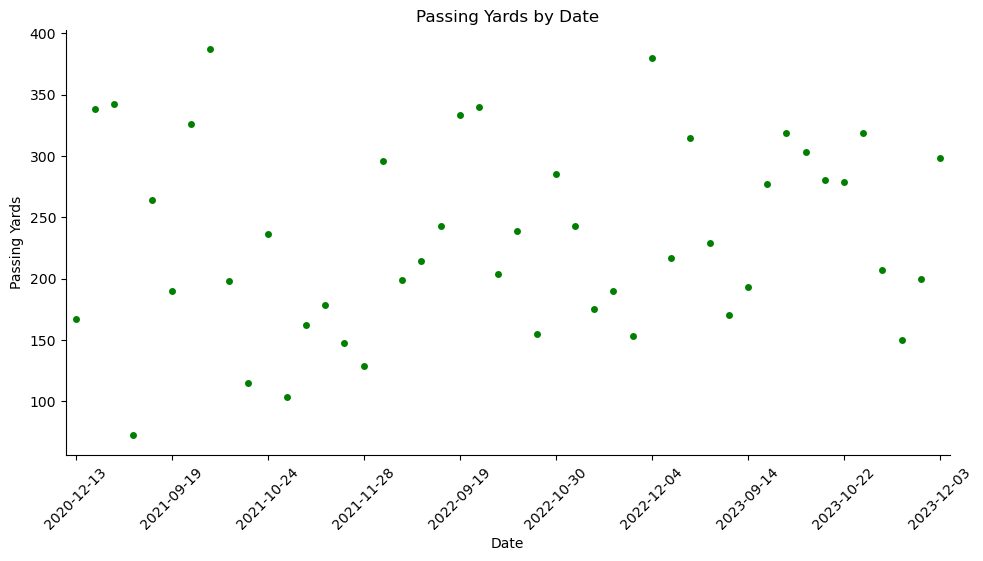

In [14]:
sns.catplot(data = df, x = 'Date', y = 'Pass YDs', aspect = 2, color="green")
plt.xlabel('Date')
plt.xticks(np.arange(0, len(df['Date']), 5),rotation = 45)
plt.ylabel('Passing Yards')
plt.title('Passing Yards by Date')
plt.show()

No significant change seen. Has been between 100 yards and 400 yards a game and generally keeping in the 150 to 300 range. No significant increase or decrease in passing yards. 

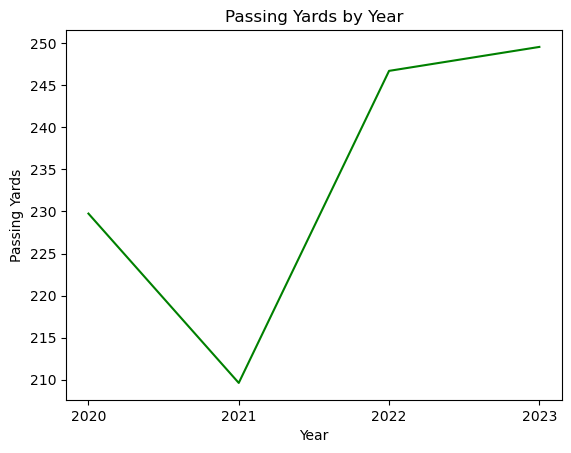

In [26]:
df.groupby('Year')['Pass YDs'].mean().plot.line(color = 'green')
plt.xlabel('Year')
plt.xticks(np.arange(2020, 2024, 1))
plt.ylabel('Passing Yards')
plt.title('Passing Yards by Year')
plt.show()

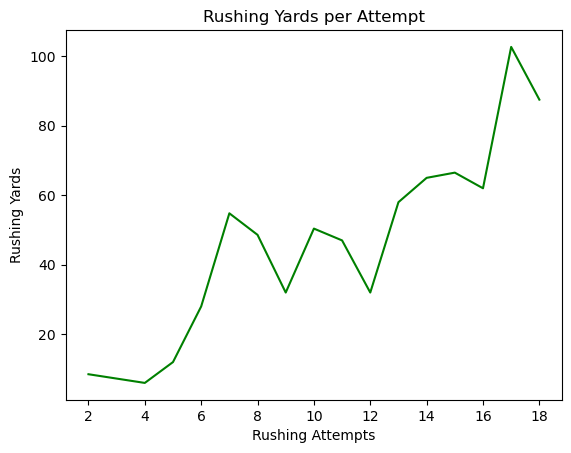

In [15]:
sns.lineplot(x = 'Rush Att', y = 'Rush YDs', data = df, color = 'green', errorbar = None)
plt.xlabel('Rushing Attempts')
plt.ylabel('Rushing Yards')
plt.title('Rushing Yards per Attempt')
plt.show()

By rushing the ball in the 7 to 12 attempts range, we see Hurts has the same yardage gained between 25 and 60. Once past 12 attempts, those numbers greatly increase. His yardage peaks as 17 attempts. 

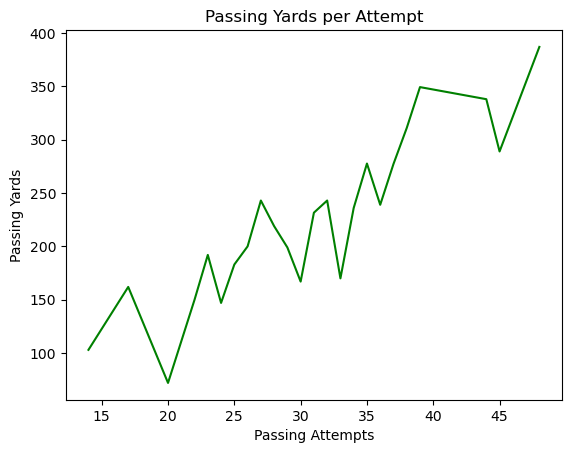

In [16]:
sns.lineplot(x = 'Pass Att', y = 'Pass YDs', data = df, color = 'green', errorbar = None)
plt.xlabel('Passing Attempts')
plt.ylabel('Passing Yards')
plt.title('Passing Yards per Attempt')
plt.show()

The more passing attempts made the more passing yards thrown. This and the rushing yards by attempts graphs seem very common sense. The more times he passes, the more yards he will get. The same with rushing. 

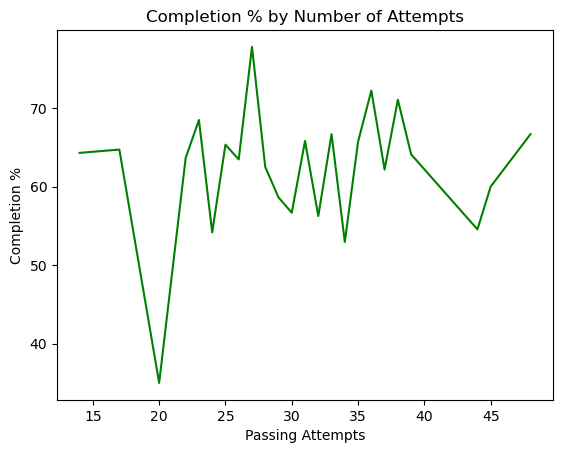

In [17]:
sns.lineplot(x = 'Pass Att', y = 'Cmp%', data = df, color = 'green', errorbar = None)
plt.xlabel('Passing Attempts')
plt.ylabel('Completion %')
plt.title('Completion % by Number of Attempts')
plt.show()

There is no significant change in his completion percentage when he throws the ball more. This means that number of throws made does not significantly increase the share of those throws being completed.

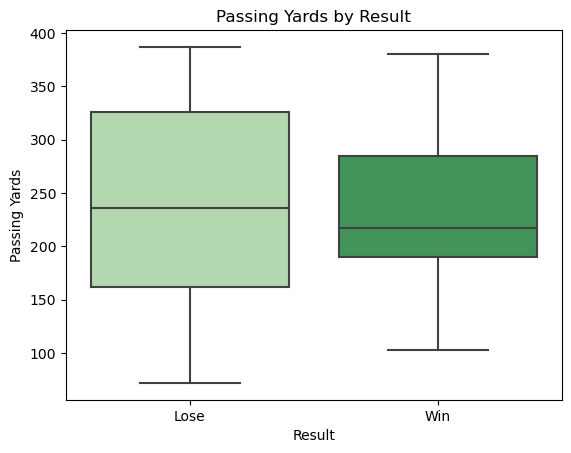

In [18]:
fig = sns.boxplot(x="Class", y="Pass YDs", data=df, palette = 'Greens')
plt.xlabel('Result')
fig.set_xticklabels(['Lose','Win'])
plt.ylabel('Passing Yards')
plt.title('Passing Yards by Result')
plt.show()

While the range of passing yards for both wins and loses is in a similar range, the majority percentile between 25% and 75% is much smaller for wins. Winning games occur more between the 190 and 280 passing yards range while loses have amuch broader range. This shows no significant information. 

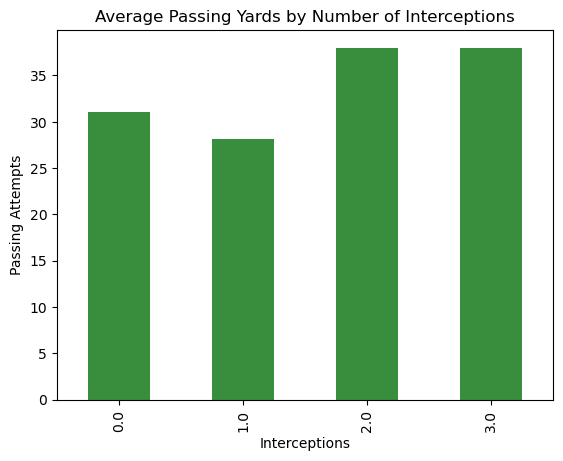

In [19]:
df.groupby('Int')['Pass Att'].mean().plot.bar(color = '#388E3C')
plt.xlabel('Interceptions')
plt.ylabel('Passing Attempts')
plt.title('Average Passing Yards by Number of Interceptions')
plt.show()

More interceptions come when the passing attempts are higher on average. This makes sense as with more passing attempts there are also more attempts to make an interception by the defense.

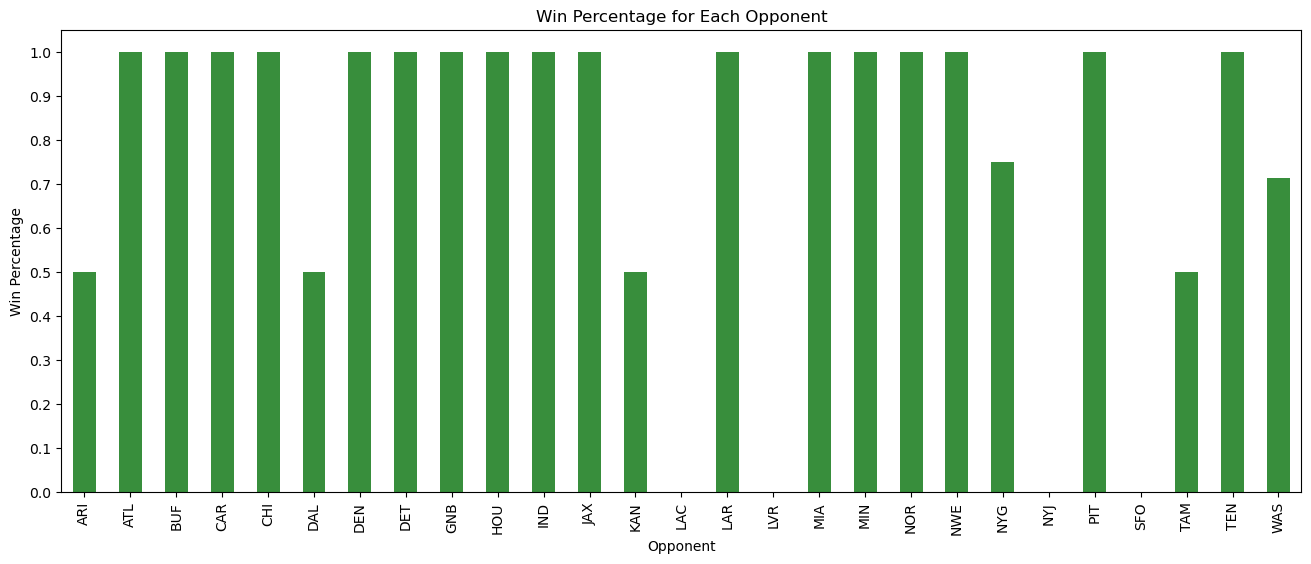

In [20]:
df.groupby('Opp')['Class'].mean().plot.bar(figsize = (16,6), color = '#388E3C')
plt.xlabel('Opponent')
plt.yticks(np.arange(0,1.1,.1))
plt.ylabel('Win Percentage')
plt.title('Win Percentage for Each Opponent')
plt.show()

The teams that Jalen Hurts has struggled the most against are the Chargers, the Raiders, the Jets, and the 49ers. 

In [24]:
df.value_counts('Opp')

Opp
WAS    7
NYG    4
DAL    4
KAN    2
TAM    2
SFO    2
NOR    2
MIN    2
ARI    2
DET    2
HOU    1
NWE    1
TEN    1
BUF    1
CAR    1
PIT    1
NYJ    1
CHI    1
DEN    1
IND    1
MIA    1
LVR    1
LAR    1
ATL    1
GNB    1
JAX    1
LAC    1
dtype: int64

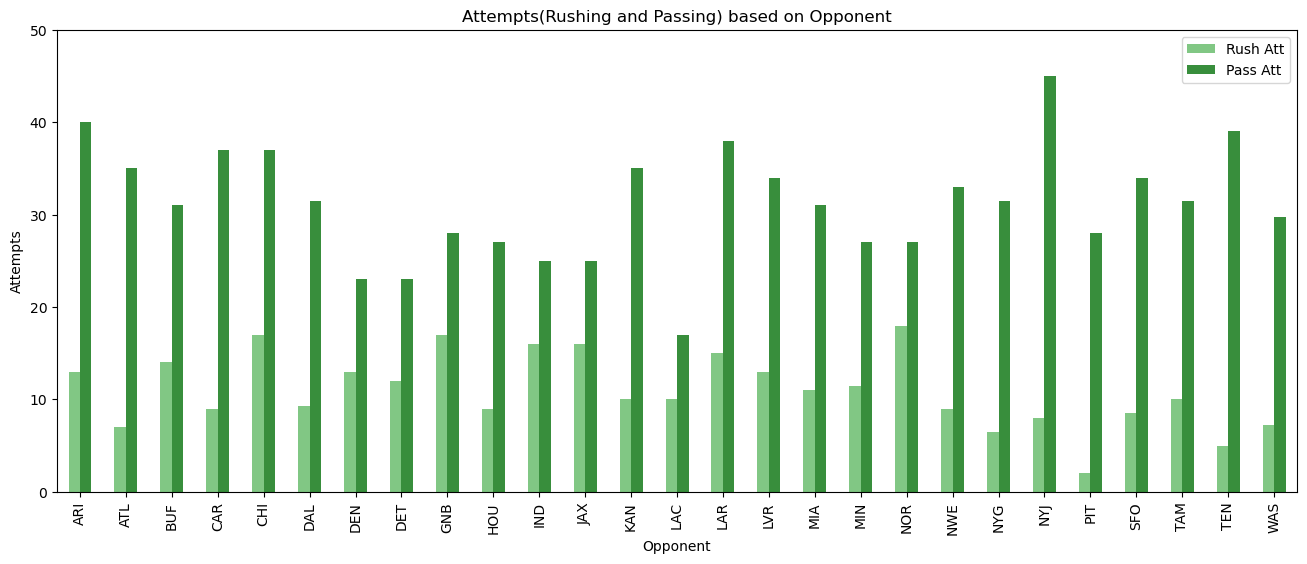

In [21]:
df.groupby('Opp')[['Rush Att', 'Pass Att']].mean().plot.bar(figsize = (16,6), color = ['#81C784','#388E3C'])
plt.yticks(np.arange(0,60,10))
plt.ylabel('Attempts')
plt.xlabel('Opponent')
plt.title('Attempts(Rushing and Passing) based on Opponent')
plt.show()

See the ratio between passing and rushing attempts based on opponent paints a clear picture of what is the more successful strategy when comparing it to the Win Percentage by Opponent graph. 

In [22]:
features = df[['Rank','H/A','Opp','Pass Att', 'Cmp%', 'Pass YDs', 'Pass TDs', 'Int', 'Sacks', 'Rush Att', 'Rush YDs', 'TDs']]

features_one_hot = pd.get_dummies(features, columns = ['H/A','Opp'])
features_one_hot.shape

(46, 39)

This step is not part of the EDA. I am making a dummies dataframe for all the categorical variables for future use when a machine learning model is implemented. 

In [23]:
features_one_hot.astype(float, errors = 'ignore')

,Rank,Pass Att,Cmp%,Pass YDs,Pass TDs,Int,Sacks,Rush Att,Rush YDs,TDs,...,Opp_MIN,Opp_NOR,Opp_NWE,Opp_NYG,Opp_NYJ,Opp_PIT,Opp_SFO,Opp_TAM,Opp_TEN,Opp_WAS
0,13.0,30.0,56.67,167.0,1.0,0.0,0.0,18.0,106.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,14.0,44.0,54.55,338.0,3.0,0.0,6.0,11.0,63.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,15.0,39.0,53.85,342.0,1.0,2.0,3.0,9.0,69.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,16.0,20.0,35.00,72.0,0.0,1.0,1.0,8.0,34.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,17.0,35.0,77.14,264.0,3.0,0.0,1.0,7.0,62.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,18.0,23.0,52.17,190.0,0.0,0.0,2.0,10.0,82.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,19.0,39.0,64.10,326.0,2.0,2.0,2.0,9.0,35.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,20.0,48.0,66.67,387.0,2.0,0.0,3.0,8.0,47.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,21.0,37.0,59.46,198.0,0.0,1.0,2.0,9.0,30.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,22.0,26.0,46.15,115.0,1.0,1.0,2.0,10.0,44.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
features_one_hot.to_csv('hurts_withdummies_dataset.csv', index=False)